In [1]:
#importing necessary packages
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn import cluster
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
start = time.time()
f = open("docword.kos.txt","r")
a = f.readlines()
b = a[0:3]
a = a[3:]
f.close()
a = [i.replace("\n","") for i in a]
b = [i.replace("\n","") for i in b]
a = [i.split(" ") for i in a]
df = pd.DataFrame(a)
df

,0,1,2
0,1,61,2
1,1,76,1
2,1,89,1
3,1,211,1
4,1,296,1
...,...,...,...
353155,3430,6328,1
353156,3430,6644,1
353157,3430,6741,1
353158,3430,6799,1


In [3]:
#Creating list of unique Document IDs
docID = df[0].unique()
docID = list(docID)
docID = list(map(int,docID))
len(docID)

3430

In [4]:
#Building the required sparse matrix
M = np.zeros([6907,3431])

In [5]:
#Creating list of word IDs in each Document IDs
for j in range(len(df[1])):
    M[int(df[1][j]),int(df[0][j])] = 1
SM = pd.DataFrame(M)
SM = SM.iloc[1:,1:]
SM

,1,2,3,4,5,6,7,8,9,10,...,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6905,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Calculating Jaccard indexes
Sym = SM.to_numpy()
Sym = np.transpose(Sym)
J = 1-pairwise_distances(Sym,metric="jaccard")
J = pd.DataFrame(J)
J

C:\Users\AVIK DAS\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


,0,1,2,3,4,5,6,7,8,9,...,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429
0,1.000000,0.066667,0.035398,0.042781,0.080717,0.039062,0.061350,0.037037,0.222222,0.029851,...,0.038043,0.045455,0.043478,0.028369,0.046667,0.072993,0.076271,0.042169,0.019108,0.029586
1,0.066667,1.000000,0.062857,0.027972,0.048913,0.049383,0.068376,0.033708,0.054054,0.084337,...,0.051471,0.031674,0.073171,0.077778,0.058252,0.064516,0.067568,0.033058,0.027523,0.024390
2,0.035398,0.062857,1.000000,0.032710,0.051181,0.039216,0.047368,0.050633,0.043716,0.025000,...,0.038278,0.696629,0.043210,0.036364,0.033898,0.054878,0.033784,0.031088,0.033333,0.025641
3,0.042781,0.027972,0.032710,1.000000,0.157360,0.016949,0.032258,0.024194,0.013333,0.024590,...,0.034884,0.035433,0.023973,0.031250,0.028571,0.030769,0.017857,0.032258,0.027972,0.032051
4,0.080717,0.048913,0.051181,0.157360,1.000000,0.031056,0.072917,0.061350,0.076087,0.023952,...,0.041860,0.065517,0.061538,0.022989,0.049724,0.052632,0.052632,0.051020,0.043243,0.056122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,0.072993,0.064516,0.054878,0.030769,0.052632,0.090909,0.098039,0.097222,0.130435,0.040541,...,0.023622,0.053922,0.032922,0.090909,0.142857,1.000000,0.346939,0.066667,0.076087,0.066038
3426,0.076271,0.067568,0.033784,0.017857,0.052632,0.106383,0.108434,0.092593,0.105263,0.036364,...,0.028037,0.031746,0.031250,0.066667,0.101449,0.346939,1.000000,0.121951,0.053333,0.056818
3427,0.042169,0.033058,0.031088,0.032258,0.051020,0.031579,0.045455,0.029412,0.031746,0.009804,...,0.026316,0.029915,0.037453,0.047619,0.060870,0.066667,0.121951,1.000000,0.262626,0.029630
3428,0.019108,0.027523,0.033333,0.027972,0.043243,0.062500,0.024590,0.045455,0.035398,0.022727,...,0.036232,0.036364,0.023256,0.043011,0.048077,0.076087,0.053333,0.262626,1.000000,0.285714


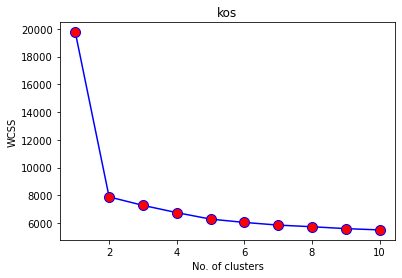

In [7]:
#Fitting the model for different number of clusters
l = []
for i in range(1,11):
    model = KMeans(n_clusters=i,init="k-means++",max_iter=100,n_init=10)
    model.fit(J)
    l.append(model.inertia_)
plt.title("kos")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.plot(list(range(1,11)),l,c="b",marker="o",markerfacecolor="red",markersize=10)

In [8]:
#Final fitting of the model using optimum number of clusters
k_means = cluster.KMeans(n_clusters=2,random_state=42)
k_means.fit(J)
y_pred = k_means.predict(J)

C:\Users\AVIK DAS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


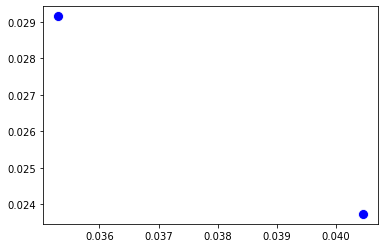

In [9]:
#plotting the centroids
sns.scatterplot(k_means.cluster_centers_[:,0],
               k_means.cluster_centers_[:,1],
               marker="o",
               color="b",
               s=100);

In [10]:
#dimension reduction for visualization
PM = PCA(n_components = 2)
Mnew = PM.fit_transform(J)
x,y = Mnew[:,0],Mnew[:,1]
cluster_col = {0:"orange",1:"green"}
clusters_names = {0:"cluster1",1:"cluster2"}
clusters = k_means.labels_.tolist()

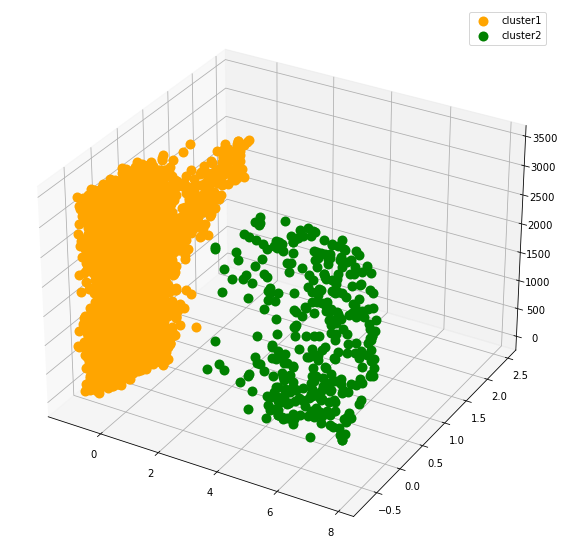

In [11]:
#3d plot for visualizing the different clusters
D = pd.DataFrame(dict(x = x, y = y, z = J.columns, label = clusters))
G = D.groupby("label")

plt.figure('KOS', figsize = (20,10))
axis = plt.axes(projection = '3d')
axis.margins(0.05)

for name, group in G:
    axis.plot(group.x, group.y, group.z, marker = "o", linestyle = "", ms = 10, 
              label = clusters_names[name], color= cluster_col[name], mec = 'none')
    axis.set_aspect('auto')
    axis.tick_params(\
                     axis = 'x',
                     which = 'both',
                     bottom = 'off',
                     top = 'off',
                     labelbottom = 'off')
    axis.tick_params(\
                     axis = 'y',
                     which = 'both',
                     bottom = 'off',
                     top = 'off',
                     labelbottom = 'off')

axis.legend(numpoints = 1)

In [12]:
#Giving output in the form of document IDs belonging to different clusters
output = {}
for i in np.unique(y_pred):
    output[i] = []
    for j in range(len(y_pred)):
        if y_pred[j] == i:
             output[i].append(j+1)
print(output)
for i in np.unique(y_pred):
    print(i,":",len(output[i]))

{0: [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 213, 214, 215, 216, 217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 232, 234, 235, 236, 237, 238, 239, 240, 241, 243, 244, 245, 24

In [13]:
#memory used
%load_ext memory_profiler 
from memory_profiler import profile
%memit k_means.fit(J)

peak memory: 726.61 MiB, increment: 173.16 MiB


In [14]:
end = time.time()
print("Time taken:",end-start)

Time taken: 128.01990866661072
